In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
dataset.rename(columns={'y': 'subscribed'}, inplace=True)

In [6]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<ipython-input-7-0b5b1b7548b6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


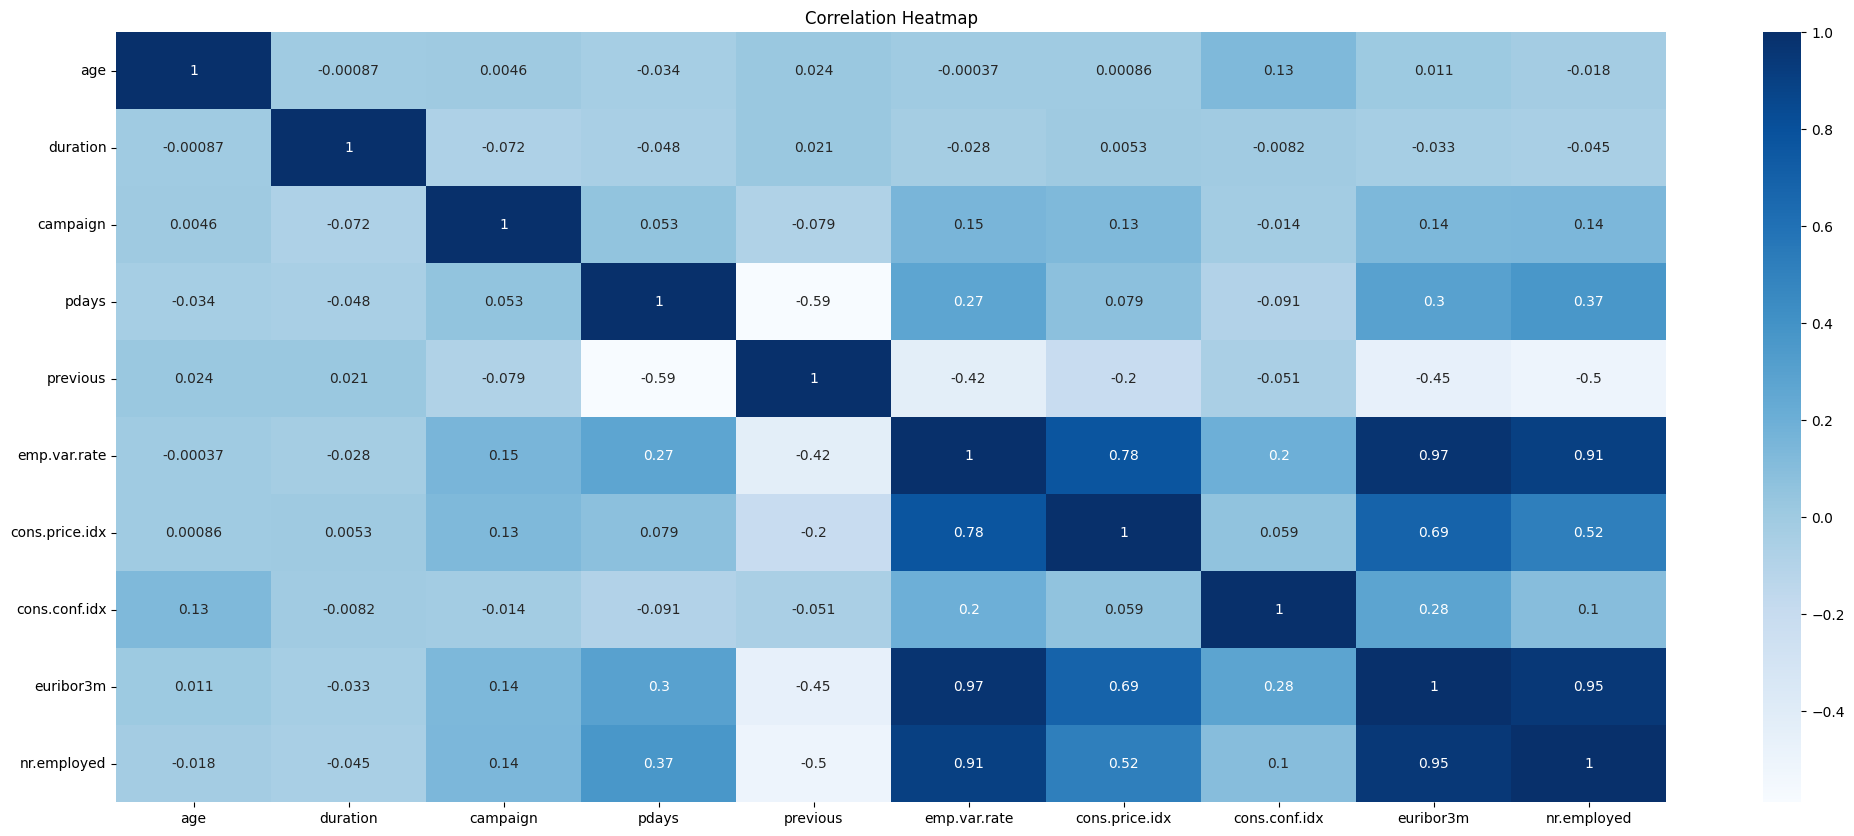

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Plot the correlation heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Guardar la imagen en un archivo
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [8]:
temp = pd.DataFrame(dataset["subscribed"].value_counts())
temp.head()

,subscribed
no,36548
yes,4640


In [ ]:
import plotly.express as px

fig = px.pie(temp,values = "subscribed",names = ["Cliente no Suscrito","Cliente Suscrito"],hole = 0.4,opacity = 0.8,
            labels = {"lable":"subscribed","subscribed":"Number of Samples"})
fig.update_layout(title = dict(text = "Gráfico circular de la característica de potabilidad"))
fig.update_traces(textposition = "outside",textinfo = "percent+label")
fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical features
for column in ['job', 'marital', 'contact', 'education', 'month', 'day_of_week' ,'poutcome', 'default', 'housing', 'loan']:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Encode the output variable
dataset['subscribed'] = label_encoder.fit_transform(dataset['subscribed'])

In [ ]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Obtener las columnas numéricas (excluyendo la última)
numeric_columns = dataset.columns[:-1]

# Fit y transform en las columnas numéricas
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,...,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.573445,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,...,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.533034,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,...,-0.204909,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.381527,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,...,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


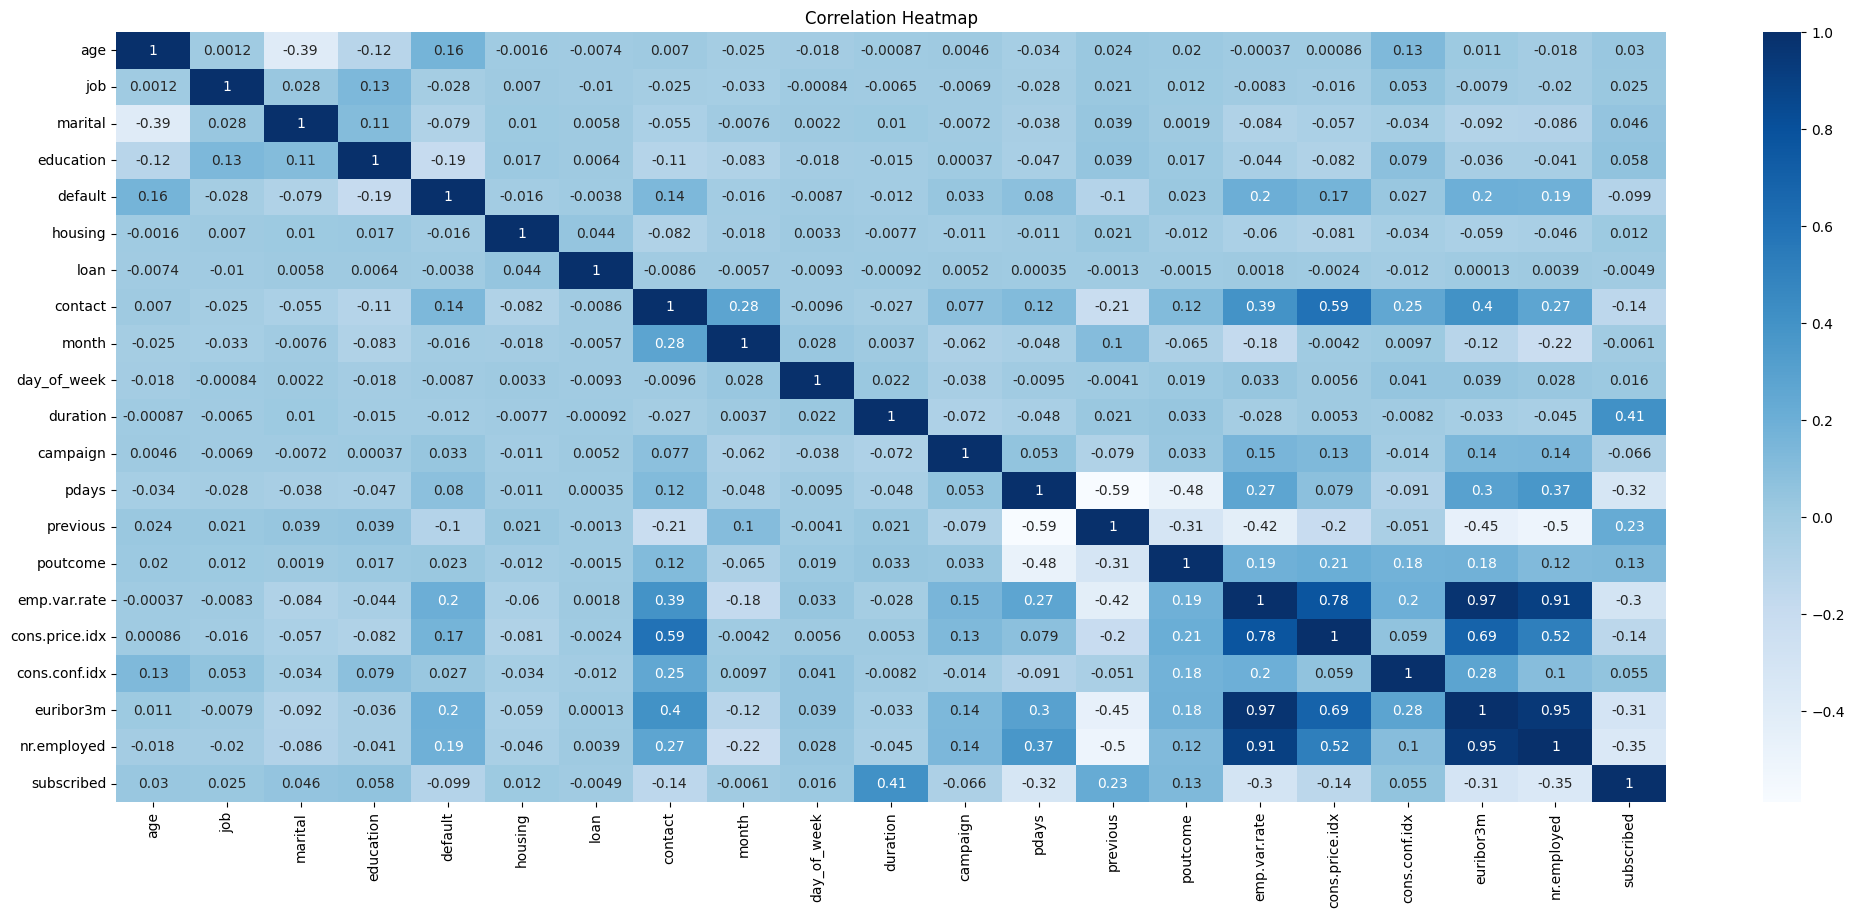

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Plot the correlation heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Preparando los datos para el Modelo
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 20]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32950, 20)
(32950,)
(8238, 20)
(8238,)


In [ ]:
# Define a dictionary to store the results
results = {}

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

<Axes: >

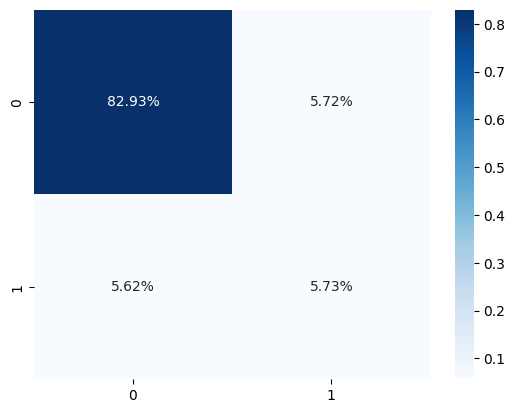

In [ ]:
import numpy as np
import seaborn as sns

cm10 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm10/np.sum(cm10), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [ ]:
import time
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

<Axes: >

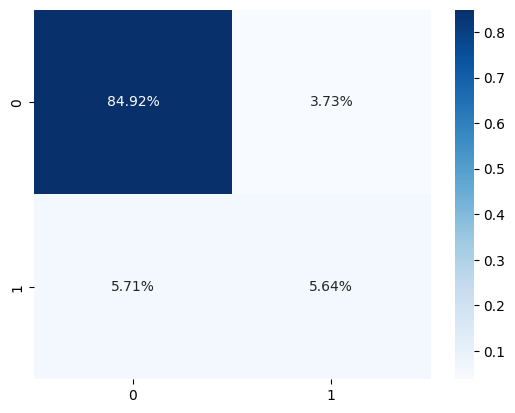

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['GaussianNB'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
import xgboost as xgb

start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
end_time = time.time()
training_time = end_time - start_time

results['Gradient Boosting Classifier'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Linear Discriminant Analysis (LDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [ ]:
#1.Neural Networks (Multi-layer Perceptron)
from sklearn.neural_network import MLPClassifier

start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Decision Trees,0.886623,0.887046,0.886623,0.886833,0.335853
Logistic Regression,0.910537,0.899552,0.910537,0.901383,0.341914
Random Forest,0.913571,0.906938,0.913571,0.909290,3.758792
Extra Trees,0.908230,0.897343,0.908230,0.899936,3.117340
GaussianNB,0.850571,0.884646,0.850571,0.863897,0.021771
AdaBoost,0.908958,0.897068,0.908958,0.898715,1.541837
XGBoost,0.914664,0.909834,0.914664,0.911782,0.510713
K-Nearest Neighbors (KNN),0.899733,0.887347,0.899733,0.891162,2.532067
Gradient Boosting Classifier,0.919762,0.912900,0.919762,0.914783,6.100375
Linear Discriminant Analysis (LDA),0.908594,0.901364,0.908594,0.904040,0.116681


from matplotlib import pyplot as plt
df_results['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Recall', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='F1-Score', y='Training Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training Time']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Training Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training Time')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training Time']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Training Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training Time')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training Time']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Training Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training Time')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training Time']
  ys = series['F1-Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Training Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training Time')
_ = plt.ylabel('F1-Score')

from matplotlib import pyplot as plt
df_results['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)